# Machine learning Part

#### Read samples data in new dataframes

In [55]:
import pandas as pd 
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
samp_rsrp = pd.read_csv('../input/samples-data/sample_rsrp.csv')
samp_traf = pd.read_csv('../input/samples-data/sample_traf.csv')

Merge two dataframes

In [57]:
new1 = pd.merge(samp_rsrp, samp_traf, how="inner", on=["LocationLatitude",'LocationLongitude','RadioOperatorName'])

Drop useless columns

In [58]:
new1.drop(["Unnamed: 0_x",'Unnamed: 0_y','RadioConnectionType_x','RadioConnectionType_y','Country_x',
           'Country_y','RadioMobileDataEnabled_x','RadioMobileDataEnabled_y','polygon','polygon3_y'], axis=1, inplace=True)

In [59]:
display(new1.head())
print(new1.shape)

,Timestamp_x,LocationLatitude,LocationLongitude,RadioNetworkGeneration_x,RadioOperatorName,RSRP,DeviceManufacturer,DeviceName,datehour_x,geometry_x,polygon3_x,Timestamp_y,RadioNetworkGeneration_y,TrafficDirection,TrafficVolume,datehour_y,geometry_y
0,2019-11-02 08:58:45.298000+00:00,24.864525,46.587463,4G,Operator A,-112,samsung,Galaxy A20S,8,POINT (46.587463 24.864525),True,2019-11-02 08:45:00+00:00,4G,Uplink,0.044431,8.0,POINT (46.587463 24.864525)
1,2019-11-02 08:58:45.298000+00:00,24.864525,46.587463,4G,Operator A,-112,samsung,Galaxy A20S,8,POINT (46.587463 24.864525),True,2019-11-02 08:45:00+00:00,4G,Downlink,0.082570,8.0,POINT (46.587463 24.864525)
2,2019-11-02 08:58:43.536000+00:00,24.864525,46.587463,4G,Operator A,-111,samsung,Galaxy A20S,8,POINT (46.587463 24.864525),True,2019-11-02 08:45:00+00:00,4G,Uplink,0.044431,8.0,POINT (46.587463 24.864525)
3,2019-11-02 08:58:43.536000+00:00,24.864525,46.587463,4G,Operator A,-111,samsung,Galaxy A20S,8,POINT (46.587463 24.864525),True,2019-11-02 08:45:00+00:00,4G,Downlink,0.082570,8.0,POINT (46.587463 24.864525)
4,2019-11-02 08:58:35.347000+00:00,24.864525,46.587463,4G,Operator A,-110,samsung,Galaxy A20S,8,POINT (46.587463 24.864525),True,2019-11-02 08:45:00+00:00,4G,Uplink,0.044431,8.0,POINT (46.587463 24.864525)


(2582, 17)


**Q1**:1. Assuming that the coverage next week will improve in that polygon compared to competition (i.e., RSRP will get better than other operators). What would be the impact on downlink and uplink **traffic volumes**?

In [60]:
operatorC = new1[new1['RadioOperatorName']=='Operator C']
operatorC.head()

,Timestamp_x,LocationLatitude,LocationLongitude,RadioNetworkGeneration_x,RadioOperatorName,RSRP,DeviceManufacturer,DeviceName,datehour_x,geometry_x,polygon3_x,Timestamp_y,RadioNetworkGeneration_y,TrafficDirection,TrafficVolume,datehour_y,geometry_y
11,2019-11-02 04:15:55.666000+00:00,24.899353,46.439205,4G,Operator C,2147483647,HMD Global,Nokia 3.2,4,POINT (46.439205 24.899353),True,2019-11-02 09:15:00+00:00,2G,Uplink,0.166234,9.0,POINT (46.439205 24.899353)
12,2019-11-02 04:15:55.666000+00:00,24.899353,46.439205,4G,Operator C,2147483647,HMD Global,Nokia 3.2,4,POINT (46.439205 24.899353),True,2019-11-02 09:15:00+00:00,4G,Uplink,2.430258,9.0,POINT (46.439205 24.899353)
13,2019-11-02 04:15:55.666000+00:00,24.899353,46.439205,4G,Operator C,2147483647,HMD Global,Nokia 3.2,4,POINT (46.439205 24.899353),True,2019-11-02 09:00:00+00:00,2G,Downlink,0.704414,9.0,POINT (46.439205 24.899353)
14,2019-11-02 04:15:55.666000+00:00,24.899353,46.439205,4G,Operator C,2147483647,HMD Global,Nokia 3.2,4,POINT (46.439205 24.899353),True,2019-11-02 09:15:00+00:00,3G,Downlink,0.235028,9.0,POINT (46.439205 24.899353)
15,2019-11-02 04:15:55.666000+00:00,24.899353,46.439205,4G,Operator C,2147483647,HMD Global,Nokia 3.2,4,POINT (46.439205 24.899353),True,2019-11-02 09:00:00+00:00,2G,Uplink,0.377594,9.0,POINT (46.439205 24.899353)


<AxesSubplot:xlabel='TrafficVolume', ylabel='RSRP'>

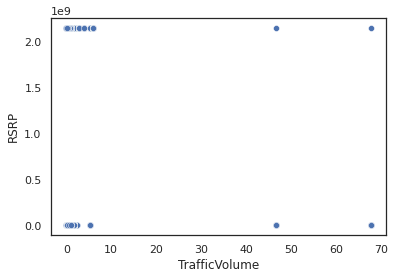

In [61]:

sns.scatterplot(data= operatorC, x='TrafficVolume', y='RSRP')

No effect on traffic volume.

**Q2** :`Samsung devices` are the main handsets in our network. Can you predict the `traffic volume` growth, uplink and downlink, over time for these devices and compare it to the competitors?

In [62]:
Samsung = new1[new1['DeviceManufacturer']=='samsung']
Samsung.head()

,Timestamp_x,LocationLatitude,LocationLongitude,RadioNetworkGeneration_x,RadioOperatorName,RSRP,DeviceManufacturer,DeviceName,datehour_x,geometry_x,polygon3_x,Timestamp_y,RadioNetworkGeneration_y,TrafficDirection,TrafficVolume,datehour_y,geometry_y
0,2019-11-02 08:58:45.298000+00:00,24.864525,46.587463,4G,Operator A,-112,samsung,Galaxy A20S,8,POINT (46.587463 24.864525),True,2019-11-02 08:45:00+00:00,4G,Uplink,0.044431,8.0,POINT (46.587463 24.864525)
1,2019-11-02 08:58:45.298000+00:00,24.864525,46.587463,4G,Operator A,-112,samsung,Galaxy A20S,8,POINT (46.587463 24.864525),True,2019-11-02 08:45:00+00:00,4G,Downlink,0.082570,8.0,POINT (46.587463 24.864525)
2,2019-11-02 08:58:43.536000+00:00,24.864525,46.587463,4G,Operator A,-111,samsung,Galaxy A20S,8,POINT (46.587463 24.864525),True,2019-11-02 08:45:00+00:00,4G,Uplink,0.044431,8.0,POINT (46.587463 24.864525)
3,2019-11-02 08:58:43.536000+00:00,24.864525,46.587463,4G,Operator A,-111,samsung,Galaxy A20S,8,POINT (46.587463 24.864525),True,2019-11-02 08:45:00+00:00,4G,Downlink,0.082570,8.0,POINT (46.587463 24.864525)
4,2019-11-02 08:58:35.347000+00:00,24.864525,46.587463,4G,Operator A,-110,samsung,Galaxy A20S,8,POINT (46.587463 24.864525),True,2019-11-02 08:45:00+00:00,4G,Uplink,0.044431,8.0,POINT (46.587463 24.864525)


### Prepare our Data for Machine Learning Algorithms

#### 1-extract `day of week` columns from timestamp

In [63]:

Samsung['Timestamp_x'] = pd.to_datetime(Samsung['Timestamp_x'], infer_datetime_format=True)
Samsung['weekday'] = Samsung['Timestamp_x'].dt.dayofweek


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#### 2-Features Selection

In [64]:
samsung = Samsung[['LocationLatitude','LocationLongitude','RadioNetworkGeneration_x',
'RSRP','datehour_x','TrafficDirection' ,'weekday' , 'TrafficVolume']]

#### 3-Looking for Correlations

In [65]:
samsung.corr()['TrafficVolume'].sort_values(ascending=False)

TrafficVolume        1.000000
RSRP                 0.287315
weekday              0.081855
LocationLatitude    -0.063173
datehour_x          -0.154047
LocationLongitude   -0.221393
Name: TrafficVolume, dtype: float64

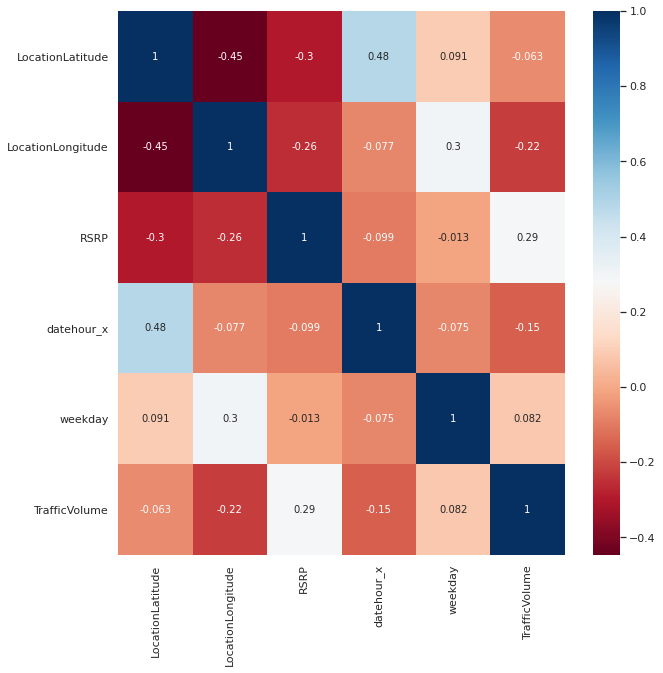

In [66]:
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(samsung.corr(), annot=True, cmap="RdBu")
plt.show()

#### 4-Data Cleaning

**Missing Value**

In [67]:
samsung.isnull().sum()

LocationLatitude            0
LocationLongitude           0
RadioNetworkGeneration_x    0
RSRP                        0
datehour_x                  0
TrafficDirection            0
weekday                     0
TrafficVolume               0
dtype: int64

In [68]:
samsung.head()

,LocationLatitude,LocationLongitude,RadioNetworkGeneration_x,RSRP,datehour_x,TrafficDirection,weekday,TrafficVolume
0,24.864525,46.587463,4G,-112,8,Uplink,5,0.044431
1,24.864525,46.587463,4G,-112,8,Downlink,5,0.082570
2,24.864525,46.587463,4G,-111,8,Uplink,5,0.044431
3,24.864525,46.587463,4G,-111,8,Downlink,5,0.082570
4,24.864525,46.587463,4G,-110,8,Uplink,5,0.044431


#### 5- Encoding Categorical Data

**Replace Values Method**<br>
This will be useful when the categories count is high and you don't want to type out each mapping. You will store the category names in a list called labels and then zip it to a seqeunce of numbers and iterate over it.

**Columns** : [RadioNetworkGeneration_x , TrafficDirection]

In [69]:
cat_coulmns = ['RadioNetworkGeneration_x' , 'TrafficDirection']
def Encoding(df,coulmn_name):
    labels = df[coulmn_name].astype('category').cat.categories.tolist()
    replace_map_comp  = {coulmn_name : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

    #return replace_map_comp

    df.replace(replace_map_comp, inplace=True)
    return df.head()
    
for column in cat_coulmns:
    
    Encoding(samsung,column)

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [70]:
samsung.head()

,LocationLatitude,LocationLongitude,RadioNetworkGeneration_x,RSRP,datehour_x,TrafficDirection,weekday,TrafficVolume
0,24.864525,46.587463,2,-112,8,2,5,0.044431
1,24.864525,46.587463,2,-112,8,1,5,0.082570
2,24.864525,46.587463,2,-111,8,2,5,0.044431
3,24.864525,46.587463,2,-111,8,1,5,0.082570
4,24.864525,46.587463,2,-110,8,2,5,0.044431


#### 6- Separating target variable and its features

In [71]:
y = samsung['TrafficVolume']
X = samsung.drop('TrafficVolume',axis=1)

#### 7-Data Scaling

In [72]:
from sklearn.preprocessing import StandardScaler

# define standard scaler
scaler = StandardScaler()
# transform data
samsung_main = scaler.fit_transform(X)

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(samsung_main, y, test_size=0.2, random_state=None)
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (189, 7)
x test:  (48, 7)
y train:  (189,)
y test:  (48,)


## Machine learning Part:

In [74]:
# import all what you need for machine learning
import sklearn
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [75]:
#fit decision tree
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
#fit random forest
forest = RandomForestRegressor(n_jobs=-1)
forest.fit(X_train, y_train)
#fit XGBoost
xg_reg = xgb.XGBRegressor(objective ='reg:linear')
xg_reg.fit(X_train, y_train)

[04:04:17] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=2, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

... and then test them on train data, in terms of RMSE:

In [76]:
models= [('XGBoost', xg_reg), ('random forest', forest), ('decision tree', tree)]

for i, model in models:    
    predictions = model.predict(X_train)
    MSE = mean_squared_error(y_train, predictions)
    RMSE = np.sqrt(MSE)
    msg = "%s = %.2f" % (i, round(RMSE, 2))
    print('RMSE of', msg)

RMSE of XGBoost = 0.34
RMSE of random forest = 0.95
RMSE of decision tree = 0.34


We can use the Mean absolute percentage error (`MAPE`) to compute a measure of accuracy that is more immediate to understand.

In [77]:
for i, model in models:
    # Make predictions on train data
    predictions = model.predict(X_train)
    # Performance metrics
    errors = abs(predictions - y_train)
    # Calculate mean absolute percentage error (MAPE)
    mape = np.mean(100 * (errors / y_train))
    # Calculate and display accuracy
    accuracy = 100 - mape    
    #print result
    msg = "%s= %.2f"% (i, round(accuracy, 2))
    print('Accuracy of', msg,'%')

Accuracy of XGBoost= 89.19 %
Accuracy of random forest= 36.03 %
Accuracy of decision tree= 89.73 %


I will cross-validate the three models and compare them .

In [78]:
models= [('XGBoost', xg_reg), ('forest', forest), ('dt', tree)]
scoring = ['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2']

#for each model I want to test three different scoring metrics. Therefore, results[0] will be lin_reg x MSE, 
# results[1] lin_reg x MSE and so on until results [8], where we stored dt x r2

results= []
metric= []
for name, model in models:
    for i in scoring:
        scores = cross_validate(model, X_train, y_train, scoring=i, cv=10, return_train_score=True)
        results.append(scores)

[04:04:18] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[04:04:18] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[04:04:18] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[04:04:18] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[04:04:18] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[04:04:18] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[04:04:18] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[04:04:18] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[04:04:18] WARNING: ../src/objective/regression_

In [79]:
#this is an example of the stored results,R2 score for XGBoost
results[2]

{'fit_time': array([0.04345536, 0.04504967, 0.04322028, 0.0427413 , 0.04344082,
        0.04547977, 0.04675674, 0.04187918, 0.04675865, 0.04383731]),
 'score_time': array([0.00174308, 0.00180054, 0.00188732, 0.00187683, 0.00175405,
        0.00172853, 0.00187016, 0.001724  , 0.00175071, 0.00172591]),
 'test_score': array([ 0.43235025,  0.98930494,  0.36066341,  0.02611492,  0.80625117,
        -0.60871308,  0.90714822, -3.20597229,  0.94565281,  0.94975996]),
 'train_score': array([0.9946962 , 0.99508676, 0.99468808, 0.99532006, 0.99473152,
        0.9949584 , 0.99525645, 0.9952562 , 0.99436453, 0.99415547])}

Now I want to compute for each combination the mean and std, so that to put into a dataframe all the metrics and easily compare them

In [80]:
#THIS IS FOR XGBoost
#if you change signa and square the Mean Square Error you get the RMSE, which is the most common metric to accuracy
XG_RMSE_mean = np.sqrt(-results[0]['test_score'].mean())
XG_RMSE_std= results[0]['test_score'].std()
# note that also here I changed the sign, as the result is originally a negative number for ease of computation
XG_MAE_mean = -results[1]['test_score'].mean()
XG_MAE_std= results[1]['test_score'].std()
XG_r2_mean = results[2]['test_score'].mean()
XG_r2_std = results[2]['test_score'].std()

#THIS IS FOR RF
RF_RMSE_mean = np.sqrt(-results[3]['test_score'].mean())
RF_RMSE_std= results[3]['test_score'].std()
RF_MAE_mean = -results[4]['test_score'].mean()
RF_MAE_std= results[4]['test_score'].std()
RF_r2_mean = results[5]['test_score'].mean()
RF_r2_std = results[5]['test_score'].std()

#THIS IS FOR DT
DT_RMSE_mean = np.sqrt(-results[6]['test_score'].mean())
DT_RMSE_std= results[6]['test_score'].std()
DT_MAE_mean = -results[7]['test_score'].mean()
DT_MAE_std= results[7]['test_score'].std()
DT_r2_mean = results[8]['test_score'].mean()
DT_r2_std = results[8]['test_score'].std()

In [81]:
modelDF = pd.DataFrame({
    'Model'       : ['XGBoost', 'Random Forest', 'Decision Trees'],
    'RMSE_mean'    : [XG_RMSE_mean, RF_RMSE_mean, DT_RMSE_mean],
    'RMSE_std'    : [XG_RMSE_std, RF_RMSE_std, DT_RMSE_std],
    'MAE_mean'   : [XG_MAE_mean, RF_MAE_mean, DT_MAE_mean],
    'MAE_std'   : [XG_MAE_std, RF_MAE_std, DT_MAE_std],
    'r2_mean'      : [XG_r2_mean, RF_r2_mean, DT_r2_mean],
    'r2_std'      : [XG_r2_std, RF_r2_std, DT_r2_std],
    }, columns = ['Model', 'RMSE_mean', 'RMSE_std', 'MAE_mean', 'MAE_std', 'r2_mean', 'r2_std'])

modelDF.sort_values(by='r2_mean', ascending=False)

,Model,RMSE_mean,RMSE_std,MAE_mean,MAE_std,r2_mean,r2_std
1,Random Forest,2.487341,5.520401,1.042954,0.510705,0.517780,0.541410
0,XGBoost,2.875852,6.695547,1.031221,0.484275,0.160256,1.223014
2,Decision Trees,3.786072,14.054655,1.216383,0.846102,0.039143,1.283859


/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


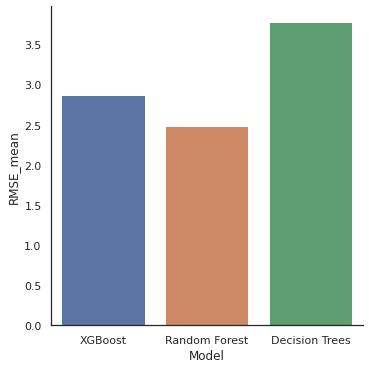

In [82]:
sns.factorplot(x= 'Model', y= 'RMSE_mean', data= modelDF, kind='bar', legend='True')

## XGBoost Tuning Parameters

**XGBoost's hyperparameters**<Br>
At this point, we should be aware of the tuning parameters that XGBoost provides. Well, there are a plethora of tuning parameters for tree-based learners in XGBoost . But the most common ones that you should know are:

`learning_rate`: step size shrinkage used to prevent overfitting. Range is [0,1]<Br>
`max_depth`: determines how deeply each tree is allowed to grow during any boosting round.<Br>
`subsample`:percentage of samples used per tree. Low value can lead to underfitting.<Br>
`colsample_bytree`: percentage of features used per tree. High value can lead to overfitting.<Br>
`n_estimators`: number of trees you want to build.<Br>
`objective`: determines the loss function to be used like reg:linear for regression problems, reg:logistic for classification problems with only decision, binary:logistic for classification problems with probability.<Br>
XGBoost also supports regularization parameters to penalize models as they become more complex and reduce them to simple (parsimonious) models.<Br>
`gamma`:controls whether a given node will split based on the expected reduction in loss after the split. A higher value leads to fewer splits. Supported only for tree-based learners.<Br>
`alpha`: L1 regularization on leaf weights. A large value leads to more regularization.<Br>
`lambda`: L2 regularization on leaf weights and is smoother than L1 regularization.<Br>
It's also worth mentioning that though you are using trees as your base learners, you can also use XGBoost's relatively less popular linear base learners and one other tree learner known as dart. All you have to do is set the booster parameter to either gbtree(default), gblinear or dart.

Here I have relied on changing the hyperparameters manually in a trial and error manner , the most importance is `max_depth` and `n_estimators`

In [83]:
import xgboost as xgb

xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.4, learning_rate = 0.3,
                max_depth = 10, alpha = 10, n_estimators = 30)
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

[04:04:34] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


Compute the rmse by invoking the mean_sqaured_error function from sklearn's metrics module.

In [84]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 2.173284


In [85]:
from sklearn.metrics import r2_score
preds_t = xg_reg.predict(X_train)
r2_score(y_train,preds_t)

0.8952645821825225

In [86]:
r2_score(y_test,preds)

0.8377308812142521

# Linear Regression

In [87]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

LinearRegression(normalize=True)

In [88]:
pred = lin_reg.predict(X_test)

In [89]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [90]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 2.724764970089872
MSE: 22.098060852078643
RMSE: 4.700857459238542
R2 Square 0.24079853621616465
__________________________________
Train set evaluation:
_____________________________________
MAE: 2.425369553240735
MSE: 15.915897734616221
RMSE: 3.989473365572983
R2 Square 0.2774107541434686
__________________________________


In [91]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,2.724765,22.098061,4.700857,0.240799,-18.869452
